<a href="https://colab.research.google.com/github/tanaypatel01032005/AI/blob/Project-1/AI_PROJECT__LINEAR%20REG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ======================
# 1. Import Libraries
# ======================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# ======================
# 2. Load Dataset
# ======================
df = pd.read_csv("/content/Housing.csv")  # Download from Kaggle and place in your working dir
print(df.head())
print(df.info())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

In [3]:

# ======================
# 3. Remove Duplicates
# ======================
print("Duplicates before:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicates after:", df.duplicated().sum())



Duplicates before: 0
Duplicates after: 0


In [4]:
# ======================
# 4. Missing Value Treatment
# ======================
print("Missing values:\n", df.isnull().sum())

# Example: Fill missing numerical with median, categorical with mode
for col in df.select_dtypes(include=["float64","int64"]).columns:
    df[col] = df[col].fillna(df[col].median())

for col in df.select_dtypes(include=["object"]).columns:
    df[col] = df[col].fillna(df[col].mode()[0])




Missing values:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [5]:
# ======================
# 5. Outlier Treatment (IQR method)
# ======================
def treat_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    df[col] = np.where(df[col] < lower, lower,
              np.where(df[col] > upper, upper, df[col]))

num_cols = df.select_dtypes(include=["float64","int64"]).columns
for col in num_cols:
    treat_outliers(col)



In [6]:
# ======================
# 6. Encoding Categorical Values
# ======================
le = LabelEncoder()
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = le.fit_transform(df[col])



In [7]:
# ======================
# 7. Normalization / Scaling
# ======================
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])



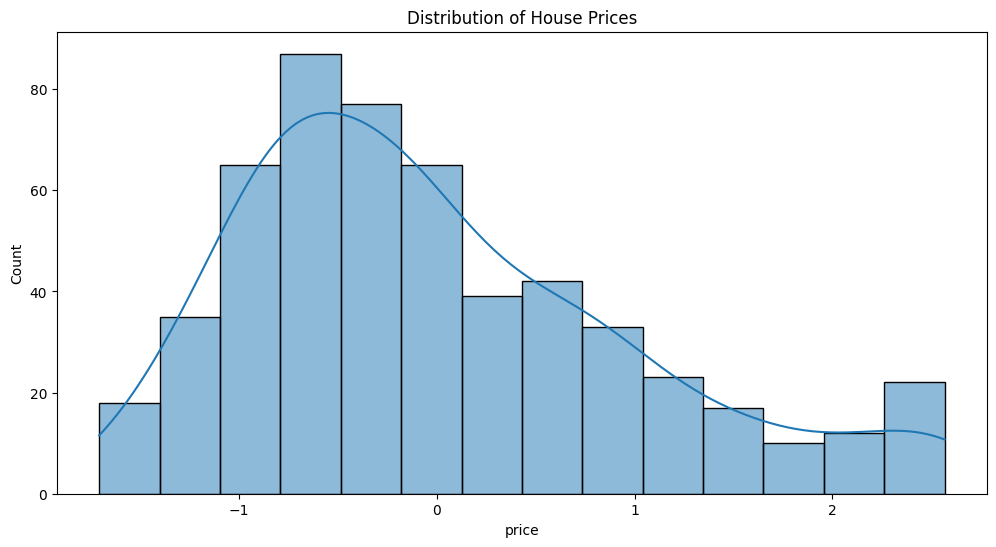

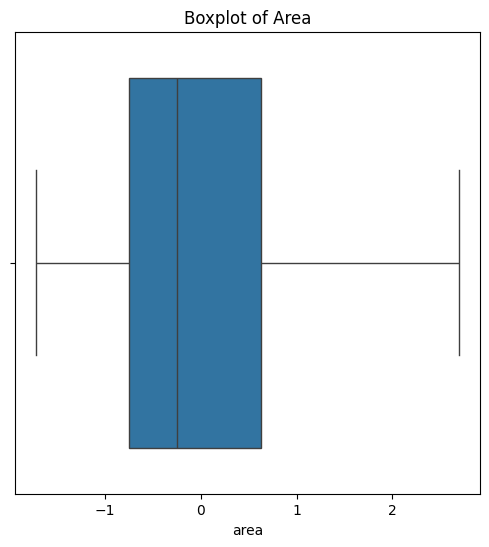

In [8]:
# ======================
# 8. Univariate Analysis
# ======================
plt.figure(figsize=(12,6))
sns.histplot(df["price"], kde=True)
plt.title("Distribution of House Prices")
plt.show()

plt.figure(figsize=(6,6))
sns.boxplot(x=df["area"])
plt.title("Boxplot of Area")
plt.show()



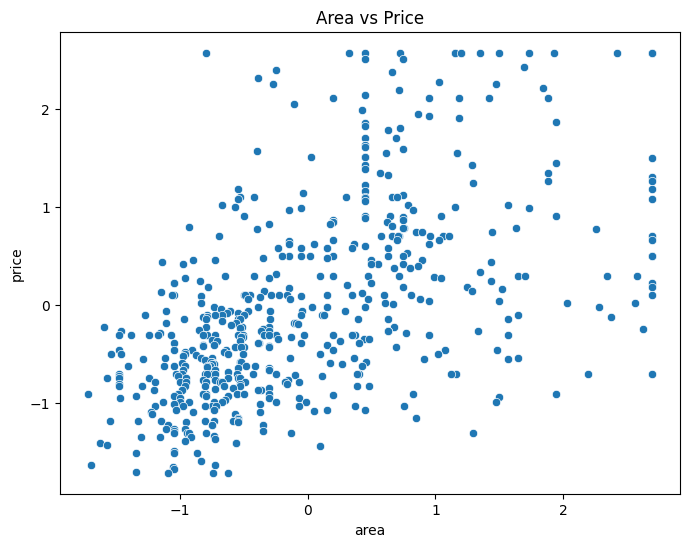

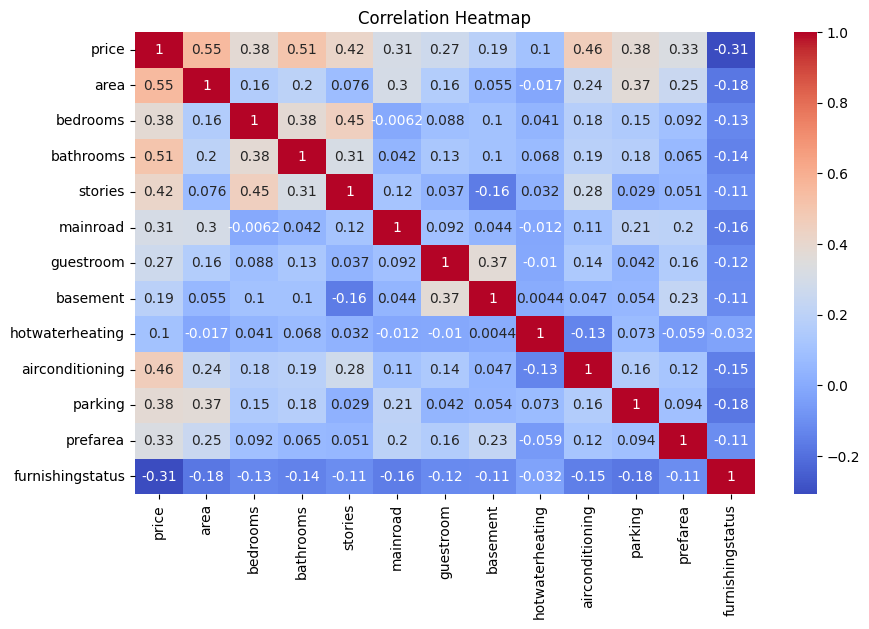

In [9]:
# ======================
# 9. Bivariate Analysis
# ======================
plt.figure(figsize=(8,6))
sns.scatterplot(x="area", y="price", data=df)
plt.title("Area vs Price")
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()



In [10]:
# ======================
# 10. Train-Test Split
# ======================
X = df.drop("price", axis=1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [11]:
# ======================
# 11. Linear Regression
# ======================
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)



In [12]:
# ======================
# 12. Model Evaluation
# ======================
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))



R2 Score: 0.6766374954615075
RMSE: 0.6555057648555495


In [13]:
# ======================
# 13. Feature Importance
# ======================
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
print(coefficients.sort_values(by="Coefficient", ascending=False))

             Feature  Coefficient
8    airconditioning     0.432953
7    hotwaterheating     0.412316
10          prefarea     0.336281
0               area     0.293377
2          bathrooms     0.291417
4           mainroad     0.213693
6           basement     0.203171
3            stories     0.191909
5          guestroom     0.138020
9            parking     0.094422
1           bedrooms     0.026509
11  furnishingstatus    -0.113992
